In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

c:\Users\Dimas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\Dimas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\Dimas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\Dimas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

# Load Dataset

In [2]:
df = pd.read_csv("IDX Banking Historical Data (current).csv",delimiter=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1388 non-null   object 
 1   Terakhir             1388 non-null   float64
 2   Pembukaan            1388 non-null   float64
 3   USD                  1388 non-null   float64
 4   Emas USD             1388 non-null   float64
 5   Consumer Confidence  1388 non-null   float64
 6   Interest Rate (%)    1388 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.0+ KB


In [4]:
df3 = pd.read_csv("IDX Banking Historical Data (current).csv",delimiter=';')

In [5]:
dates = df3['Date'][1241:].copy()
date_obj = pd.to_datetime(dates, format="%d/%m/%Y")


In [6]:
df2 = df.iloc[1241:].copy()

In [7]:
df2

,Date,Terakhir,Pembukaan,USD,Emas USD,Consumer Confidence,Interest Rate (%)
1241,02/01/2023,1147.55,1151.12,15570.0,1835.80,119.1,5.50
1242,03/01/2023,1148.82,1147.55,15595.0,1846.10,119.1,5.50
1243,04/01/2023,1137.31,1148.75,15585.0,1859.00,119.1,5.50
1244,05/01/2023,1114.40,1137.31,15605.0,1840.60,119.1,5.50
1245,06/01/2023,1110.66,1114.33,15630.0,1869.70,119.1,5.50
...,...,...,...,...,...,...,...
1383,11/08/2023,1223.61,1228.14,15020.0,1964.05,123.5,5.75
1384,14/08/2023,1227.99,1222.35,14990.0,1938.90,123.5,5.75
1385,15/08/2023,1215.09,1225.62,15015.0,1936.10,123.5,5.75
1386,16/08/2023,1214.23,1212.53,14995.0,1929.40,123.5,5.75


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

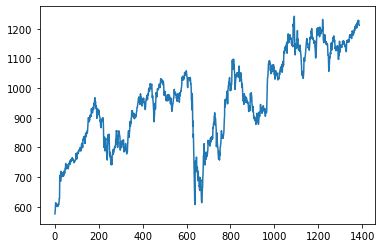

In [7]:
df['Terakhir'].plot()

In [8]:
df2.columns = ['Date', 'Close Price', 'Opening Price', 'USD/IDR', 'Gold Price','Consumer Confidence', 'Interest Rate (%)']

In [10]:
df2.describe()

,Close Price,Opening Price,USD/IDR,Gold Price,Consumer Confidence,Interest Rate (%)
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,1156.021565,1155.692109,15044.042857,1944.637279,124.008163,5.727891
std,34.841911,34.650920,217.377928,64.449645,2.812412,0.071224
min,1056.630000,1056.700000,14665.000000,1809.200000,119.100000,5.500000
25%,1134.475000,1134.440000,14897.000000,1902.900000,122.400000,5.750000
50%,1153.320000,1152.140000,14990.000000,1961.800000,123.300000,5.750000
75%,1176.805000,1175.935000,15155.000000,1994.650000,126.600000,5.750000
max,1228.060000,1228.140000,15630.000000,2081.200000,128.300000,5.750000


# Data Exploration

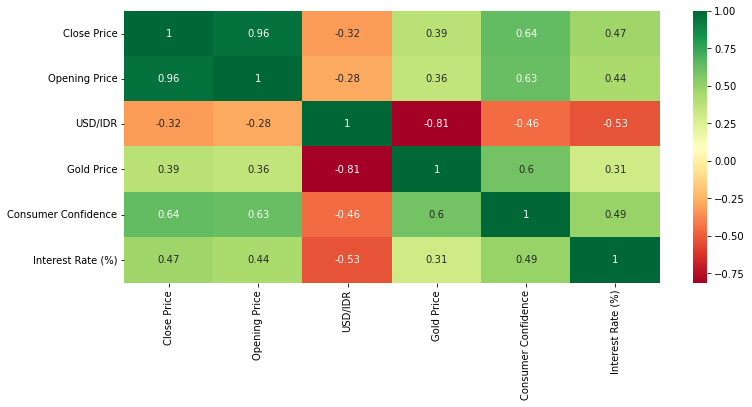

In [9]:
#get correlations of each features in dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,5))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
dates = df['Date'].copy()

In [11]:
df1 = df.copy()

In [12]:
df1.drop(['Date','Pembukaan'],axis=1,inplace=True)

In [10]:
df2.drop(['Date','Opening Price'],axis=1,inplace=True)

In [11]:
df2.reset_index(inplace=True)

In [12]:
df2.drop(['index'],axis=1,inplace=True)

In [13]:
df2

,Close Price,USD/IDR,Gold Price,Consumer Confidence,Interest Rate (%)
0,1147.55,15570.0,1835.80,119.1,5.50
1,1148.82,15595.0,1846.10,119.1,5.50
2,1137.31,15585.0,1859.00,119.1,5.50
3,1114.40,15605.0,1840.60,119.1,5.50
4,1110.66,15630.0,1869.70,119.1,5.50
...,...,...,...,...,...
142,1223.61,15020.0,1964.05,123.5,5.75
143,1227.99,14990.0,1938.90,123.5,5.75
144,1215.09,15015.0,1936.10,123.5,5.75
145,1214.23,14995.0,1929.40,123.5,5.75


# Normalization of Data

In [14]:
import numpy as np
# Create the scaler object
scaler = MinMaxScaler()
scaler1 = MinMaxScaler()

In [15]:
# Fit the scaler to your data
scaler.fit(df2)

# Transform your data using the scaler
normalized_data = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
normalized_price = scaler1.fit_transform(np.array(df2['Close Price']).reshape(-1,1))

In [16]:
normalized_data.describe()

,Close Price,USD/IDR,Gold Price,Consumer Confidence,Interest Rate (%)
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.579779,0.392791,0.497931,0.533496,0.911565
std,0.203243,0.225262,0.236947,0.305697,0.284898
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.454092,0.240415,0.344485,0.358696,1.000000
50%,0.564020,0.336788,0.561029,0.456522,1.000000
75%,0.701015,0.507772,0.681801,0.815217,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Train-test Split

In [17]:
def createdataset(dataset,timestep ) :
    DataX = []
    DataY = []

    for i in range(len(dataset)- timestep -1):
            a = dataset.iloc[i:(i+ timestep),]
            DataX.append(a)
            b = dataset.iloc[i + timestep, 0]
            DataY.append(b) #ydata consists close price
    
    return np.array(DataX), np.array(DataY)

def data_split(data, split ):
  #======= creating training and test data===#
  l1   = int(len(data) * (1- split))
  l2    = len(data) - l1
  data1  = data.iloc[0:l1,:]
  data2   = data.iloc[l1:len(data),:]
  return data1, data2

In [18]:
train_data,test_data = data_split(normalized_data,split = 0.2)
# train_data,val_data = data_split(train_data,split = 0.2)

In [19]:
timestep = 5
X_train,y_train = createdataset(train_data,timestep)
# X_val,y_val = createdataset(val_data,timestep)
X_test, y_test = createdataset(test_data,timestep)

In [20]:
train_data.shape,test_data.shape

((117, 5), (30, 5))

In [23]:
X_train.shape,X_test.shape

((111, 5, 5), (24, 5, 5))

In [25]:
X_train.shape,y_train.shape

((111, 5, 5), (111,))

In [26]:
X_test.shape, y_test.shape

((24, 5, 5), (24,))

In [21]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
# y_val = y_val.reshape(-1,1)

# LSTM Construction

In [22]:
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [40]:
# Build the LSTM model
#version 1
# batch_size = 4
# lr = 0.001
# optimizer = Adam(lr=lr)
# model = Sequential()
# model.add(LSTM(200 ,input_shape=(timestep, X_train.shape[2])))
# model.add(Dense(1,activation = 'linear'))
# model.compile(loss='mean_squared_error', optimizer= optimizer)

def create_lstm_model(units,lr, optimizer):
    model = Sequential()
    if optimizer == 'Adam':
        opt = Adam(lr=lr)
    elif optimizer == 'Adagrad':
        opt = Adagrad(lr=lr)
        
    model.add(LSTM(units=units, input_shape=(timestep, X_train.shape[2])))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=opt, loss='mean_squared_error')
    return model

In [41]:
param_grid = {
    'units': [30, 50, 100,150],
    'lr':[0.1,0.01,0.001],
    'optimizer': ['Adam','Adagrad']
}

In [43]:
batchsize = [4,8,16]
results = []
for i in batchsize:
    lstm_model = KerasRegressor(build_fn=create_lstm_model, epochs=50, batch_size=i, verbose=1)
    grid_search = GridSearchCV(estimator=lstm_model, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train,y_train)
    best_params = grid_search.best_params_
    results.append((i, best_params))


# Print the results
# for batch_size, best_params in results:
#     print(f"Batch Size: {batch_size}, Best Hyperparameters: {best_params}")

c:\Users\Dimas\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
111/111 [==============================] - 2s 16ms/sample - loss: 0.0155
Epoch 2/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0082
Epoch 3/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0075
Epoch 4/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0058
Epoch 5/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0067
Epoch 6/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0051
Epoch 7/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0052
Epoch 8/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0054
Epoch 9/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0058
Epoch 10/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0047


In [44]:
# Print the results
for batch_size, best_params in results:
    print(f"Batch Size: {batch_size}, Best Hyperparameters: {best_params}")

Batch Size: 4, Best Hyperparameters: {'lr': 0.01, 'optimizer': 'Adam', 'units': 30}
Batch Size: 8, Best Hyperparameters: {'lr': 0.01, 'optimizer': 'Adam', 'units': 50}
Batch Size: 16, Best Hyperparameters: {'lr': 0.01, 'optimizer': 'Adam', 'units': 150}


In [45]:
best_params = grid_search.best_params_
best_params

{'lr': 0.01, 'optimizer': 'Adam', 'units': 150}

# Best LSTM Model

In [69]:
best_hyperparameter = [[4,30],[8,50],[16,150]]
rmse = np.zeros(3)
increment = 0
for i,j in best_hyperparameter:
    model2 = Sequential()
    opt = Adam(lr=0.01)
    model2.add(LSTM(units=j, input_shape=(timestep, X_train.shape[2])))
    model2.add(Dense(1, activation='linear'))
    model2.compile(optimizer=opt, loss='mean_squared_error')

    history = model2.fit(X_train,y_train,epochs=50,batch_size =i)
    

    test_predict = model2.predict(X_test)
    test_predict = scaler1.inverse_transform(test_predict.reshape(-1,1))
    test_actual = scaler1.inverse_transform(y_test)
    rmse[increment] = mean_squared_error(test_actual,test_predict,squared=False)

    if increment == 0:
        model2.save('lstm0_model.h5')
    
    elif increment == 1:
        model2.save('lstm1_model.h5')

    elif increment == 2:
        model2.save('lstm2_model.h5')

    increment = increment + 1


Epoch 1/50
111/111 [==============================] - 3s 26ms/sample - loss: 0.0273
Epoch 2/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0082
Epoch 3/50
111/111 [==============================] - 0s 2ms/sample - loss: 0.0083
Epoch 4/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0064
Epoch 5/50
111/111 [==============================] - 0s 2ms/sample - loss: 0.0060
Epoch 6/50
111/111 [==============================] - 0s 2ms/sample - loss: 0.0060
Epoch 7/50
111/111 [==============================] - 0s 2ms/sample - loss: 0.0054
Epoch 8/50
111/111 [==============================] - 0s 2ms/sample - loss: 0.0075
Epoch 9/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0058
Epoch 10/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0045 0s - loss: 0.0
Epoch 11/50
111/111 [==============================] - 0s 3ms/sample - loss: 0.0040
Epoch 12/50
111/111 [==============================] - 0s 3ms/sample 

In [128]:
rmse

array([17.41446798, 10.94242307, 28.30110225])

Text(0, 0.5, 'RMSE')

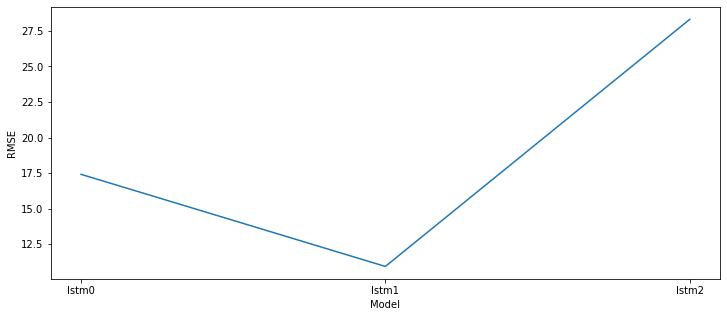

In [131]:
plt.figure(figsize=(12, 5))
plt.plot(['lstm0','lstm1','lstm2'],rmse)

plt.xlabel('Model')
plt.ylabel('RMSE')

In [23]:
from tensorflow.keras.models import load_model

best_model = load_model('lstm1_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


# Visualization

In [24]:
import matplotlib.dates as mdates

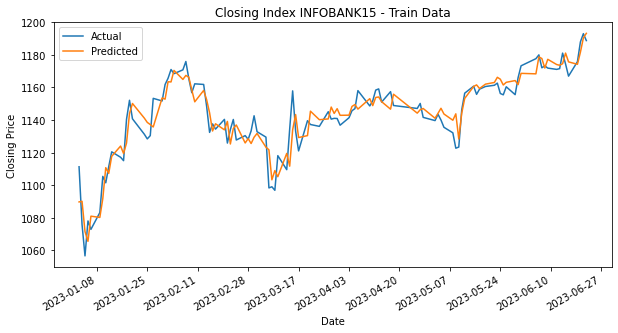

In [25]:
train_predict = best_model.predict(X_train)
train_predict = scaler1.inverse_transform(train_predict.reshape(-1,1))
train_actual = scaler1.inverse_transform(y_train)
train_predict.shape,train_actual.shape

plt.figure(figsize=(10,5))
plt.plot(date_obj[:111],train_actual, label='Actual')
plt.plot(date_obj[:111],train_predict, label='Predicted')
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis_date()

# Set the x-axis ticker locator to show ticks for years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=17))

plt.gcf().autofmt_xdate()
plt.title('Closing Index INFOBANK15 - Train Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

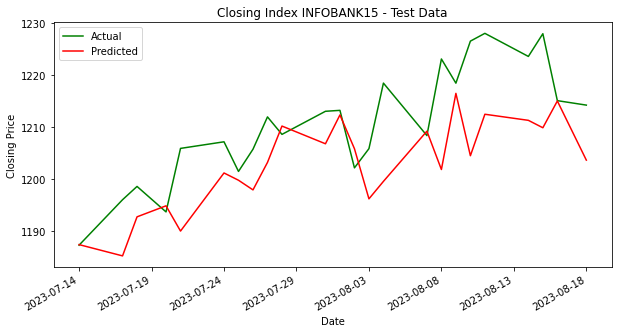

In [26]:
test_predict = best_model.predict(X_test)
test_predict = scaler1.inverse_transform(test_predict.reshape(-1,1))
test_actual = scaler1.inverse_transform(y_test)

plt.figure(figsize=(10,5))

plt.plot(date_obj[123:],test_actual, label='Actual',color = 'green')
plt.plot(date_obj[123:],test_predict, label='Predicted',color = 'red')
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis_date()

# Set the x-axis ticker locator to show ticks for years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.gcf().autofmt_xdate()
plt.title('Closing Index INFOBANK15 - Test Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

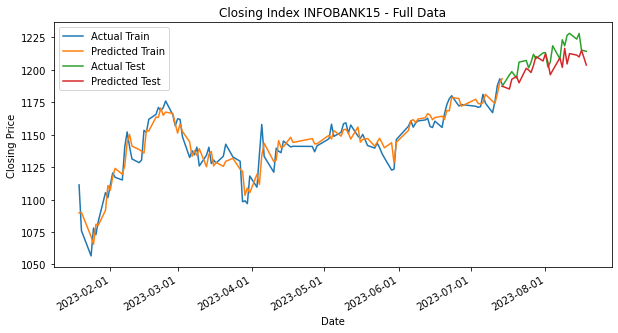

In [80]:
plt.figure(figsize=(10,5))
plt.plot(date_obj[13:124],train_actual, label='Actual Train')
plt.plot(date_obj[13:124],train_predict, label='Predicted Train')
plt.plot(date_obj[123:],test_actual, label='Actual Test')
plt.plot(date_obj[123:],test_predict, label='Predicted Test')
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis_date()

# Set the x-axis ticker locator to show ticks for years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=11))

plt.gcf().autofmt_xdate()
plt.title('Closing Index INFOBANK15 - Full Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Forecasting

In [330]:
normalized_data.describe()

,Close Price,USD/IDR,Gold Price,Consumer Confidence,Interest Rate (%)
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.579779,0.392791,0.497931,0.533496,0.911565
std,0.203243,0.225262,0.236947,0.305697,0.284898
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.454092,0.240415,0.344485,0.358696,1.000000
50%,0.564020,0.336788,0.561029,0.456522,1.000000
75%,0.701015,0.507772,0.681801,0.815217,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
mean_usd = 0.392791	
std_usd = 0.225262
mean_emas = 0.497931	
std_emas = 	0.236947	
mean_CC = 0.533496
std_CC = 0.305697	
mean_interest = 0.911565
std_interest = 0.284898
min_value = 0.0
max_value = 1.0

In [29]:
list_predict = []
future_seq = X_test.copy()
for i in range(135):
    next_seq = best_model.predict(future_seq)
    list_predict.append(next_seq[-1,-1])
    random_usd = np.clip(np.random.normal(mean_usd, std_usd), 0.7, 1.0)
    random_emas = np.clip(np.random.normal(mean_emas, std_emas), 0.7, 1.0)
    random_CC = np.clip(np.random.normal(mean_CC, std_CC), 0.8, 1.0)
    random_interest = np.clip(np.random.normal(mean_interest, std_interest), 0.8, 1.0)
    # additional_values = np.array([[next_seq[-1,-1], random.gauss(0.392791,0.22526), random.gauss(0.497931,0.236947), random.gauss(0.533496,0.305697), random.gauss(0.911565,0.088000)]])
    # additional_values = np.expand_dims(additional_values, axis=1)  # Expand dimensions to match the shape
    additional_values = np.array([[next_seq[-1,-1], random_usd, random_emas, random_CC, random_interest]])
    future_seq = np.concatenate((future_seq[-1,1:,:],additional_values))
    future_seq = future_seq.reshape(1,5,5)
    # future_seq = np.expand_dims(future_seq, axis=0)

In [30]:
list_predict = np.array(list_predict)
true_extrapolation = scaler1.inverse_transform(list_predict.reshape(-1,1))

In [31]:
start_date = "2023-08-19"
days_to_add = 134

date_range = pd.date_range(start=start_date, periods=days_to_add+1, freq='D')
date_range = pd.Series(date_range)

In [32]:
date_range = np.array(date_range)


In [33]:
combined = np.concatenate((test_predict , true_extrapolation), axis=None)


In [82]:
temp = pd.Series(date_obj[123:].copy())


In [77]:
date_obj

1241   2023-01-02
1242   2023-01-03
1243   2023-01-04
1244   2023-01-05
1245   2023-01-06
          ...    
1383   2023-08-11
1384   2023-08-14
1385   2023-08-15
1386   2023-08-16
1387   2023-08-18
Name: Date, Length: 147, dtype: datetime64[ns]

In [83]:
date_combined = np.concatenate((temp,date_range))

In [84]:
date_combined.shape,combined.shape

((159,), (159,))

In [92]:
date_combined[24:].shape,true_extrapolation.shape

((135,), (135, 1))

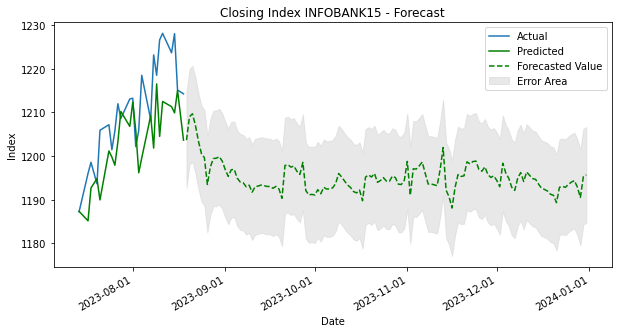

In [95]:
plt.figure(figsize=(10,5))
plt.plot(date_combined[:24],test_actual, label='Actual')
plt.plot(date_combined[:24],combined[:24], label='Predicted',color = 'green')
plt.plot(date_combined[24:],combined[24:], label='Forecasted Value',linestyle = '--',color = 'green')
# plt.plot(date_combined[110:134],test_actual, label='Actual Test')
# plt.plot(date_combined[110:134],test_predict, label='Predicted Test')
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis_date()

# Sample error values (can be standard deviations, confidence intervals, etc.)
y_error = np.array([10.94])
y_lower = []
y_upper = []
# Calculate upper and lower bounds for the error area
# for i in true_extrapolation:
#     lower = i - y_error
#     y_lower.append(lower)
#     upper = i + y_error
#     y_upper.append(upper)

y_upper = np.array([i + y_error for i in true_extrapolation]).reshape(1,-1)
y_lower = np.array([i - y_error for i in true_extrapolation]).reshape(1,-1)

# plt.plot(date_combined[24:],true_extrapolation)
# Fill the area between the upper and lower bounds with a color (e.g., light gray)
plt.fill_between(date_combined[24:], y_lower.flatten(), y_upper.flatten(), color='lightgray', alpha=0.5, label='Error Area')
# Set the x-axis ticker locator to show ticks for years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=11))

plt.gcf().autofmt_xdate()
plt.title('Closing Index INFOBANK15 - Forecast')
plt.xlabel('Date')
plt.ylabel('Index')
plt.legend()
plt.show()

# Random Scribbles

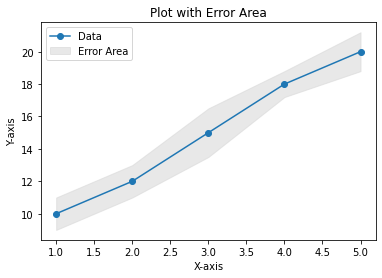

In [333]:
# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 12, 15, 18, 20])

# Sample error values (can be standard deviations, confidence intervals, etc.)
y_error = np.array([1, 1, 1.5, 0.8, 1.2])

# Calculate upper and lower bounds for the error area
y_lower = y - y_error
y_upper = y + y_error

# Create the plot
plt.plot(x, y, marker='o', label='Data')

# Fill the area between the upper and lower bounds with a color (e.g., light gray)
plt.fill_between(x, y_lower, y_upper, color='lightgray', alpha=0.5, label='Error Area')

# Add labels, title, legend, etc.
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot with Error Area')
plt.legend()

# Display the plot
plt.show()

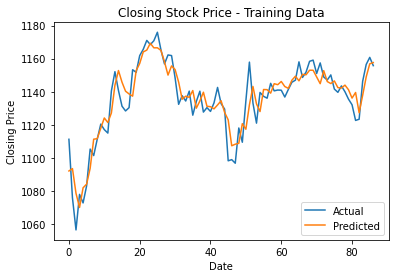

In [134]:
# # test_predict = model.predict(X_test)
# train_predict = scaler1.inverse_transform(y_pred_train.reshape(-1,1))
# train_actual = scaler1.inverse_transform(y_train)


# plt.plot(train_actual, label='Actual')
# plt.plot(train_predict, label='Predicted')
# plt.title('Closing Stock Price - Training Data')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.legend()
# plt.show()

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

Train on 87 samples, validate on 18 samples
Epoch 1/50
87/87 [==============================] - 4s 46ms/sample - loss: 0.0275 - val_loss: 0.0060
Epoch 2/50
87/87 [==============================] - 1s 10ms/sample - loss: 0.0098 - val_loss: 0.0233
Epoch 3/50
87/87 [==============================] - 1s 10ms/sample - loss: 0.0078 - val_loss: 0.0144
Epoch 4/50
87/87 [==============================] - 1s 9ms/sample - loss: 0.0079 - val_loss: 0.0128
Epoch 5/50
87/87 [==============================] - 1s 9ms/sample - loss: 0.0069 - val_loss: 0.0212
Epoch 6/50
87/87 [==============================] - 1s 9ms/sample - loss: 0.0068 - val_loss: 0.0284
Epoch 00006: early stopping


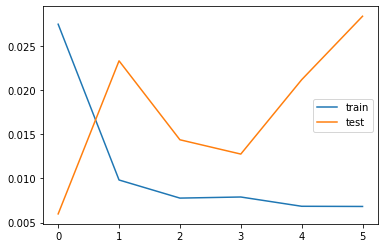

In [82]:
# Define the EarlyStopping callback
# early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
# early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# # Train the model

# history = model.fit(X_train, y_train,validation_data=(X_val,y_val) ,epochs=50,batch_size = 4,callbacks=[early_stop])
# # model.save('lstm_model.h5')
# # history = model.fit(X_train, y_train ,epochs=50,batch_size=16,callbacks=[early_stop])
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

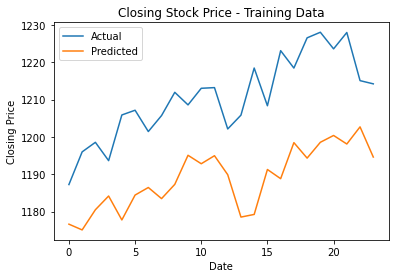

In [132]:
# test_predict = model.predict(X_test)
test_predict = scaler1.inverse_transform(y_pred.reshape(-1,1))
test_actual = scaler1.inverse_transform(y_test)


plt.plot(test_actual, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title('Closing Stock Price - Training Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [139]:
test_predict.shape

(122, 1)

In [58]:


# rmse_tes = mean_squared_error(test_actual, test_predict,squared=False)
# rmse_tes

In [50]:
normalized_data.describe()

,Terakhir,USD,Emas USD,Consumer Confidence,Interest Rate (%)
count,638.000000,638.000000,638.000000,638.000000,638.000000
mean,0.653588,0.477447,0.222734,0.676108,0.326890
std,0.213179,0.216894,0.388669,0.370375,0.423427
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.512611,0.313097,0.000848,0.798683,0.000000
50%,0.709950,0.426423,0.013524,0.864723,0.000000
75%,0.823755,0.622792,0.020859,0.893033,0.888889
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
#generate random
import random


# USD
# mean_usd = 0.356306	
# std_usd = 0.184981
# mean_emas = 0.113922	
# std_emas = 	0.281921	
# mean_CC = 0.663953
# std_CC = 0.259600	
# mean_interest = 0.453746
# std_interest = 0.359554
# min_value = 0.0
# max_value = 1.0

# Generate a random float from a normal distribution with mean 0 and standard deviation 1
# random_float1 = random.gauss(0.392791,0.22526)
# random_float2 = random.gauss(0.497931,0.236947)
# random_float3 = random.gauss(0.533496,0.305697)
# random_float4 = random.gauss(0.911565,0.284898)


# additional_values = np.array([[test_predict[-1,0],random_float1,random_float2,random_float3,random_float4]])
# additional_values = np.expand_dims(additional_values, axis=1)
# additional_values.shape

In [52]:
list_predict = []
future_seq = X_test.copy()
for i in range(135):
    next_seq = model.predict(future_seq)
    list_predict.append(next_seq[-1,-1])
    random_usd = np.clip(np.random.normal(mean_usd, std_usd), 0.0, 1.0)
    random_emas = np.clip(np.random.normal(mean_emas, std_emas), 0.0, 1.0)
    random_CC = np.clip(np.random.normal(mean_CC, std_CC), 0.0, 1.0)
    random_interest = np.clip(np.random.normal(mean_interest, std_interest), 0.0, 1.0)
    # additional_values = np.array([[next_seq[-1,-1], random.gauss(0.392791,0.22526), random.gauss(0.497931,0.236947), random.gauss(0.533496,0.305697), random.gauss(0.911565,0.088000)]])
    # additional_values = np.expand_dims(additional_values, axis=1)  # Expand dimensions to match the shape
    additional_values = np.array([[next_seq[-1,-1], random_usd, random_emas, random_CC, random_interest]])
    future_seq = np.concatenate((future_seq[-1,1:,:],additional_values))
    future_seq = future_seq.reshape(1,5,5)
    # future_seq = np.expand_dims(future_seq, axis=0)

# print(future_seq.shape)

In [254]:


desired_mean = 0.533496
desired_std = 0.305697
max_value = 1.0
min_value = 0.0


# sample = next(x for x in iter(lambda: random.gauss(desired_mean, desired_std), None) if x <= max_value)

for i in range(10):
    sample = np.clip(np.random.normal(desired_mean, desired_std), 0.0, 1.0)
    print(sample)
  

0.4471343139995788
0.6495668687002418
0.5672896764195507
0.2293185469528929
1.0
0.5090986098691079
0.31825769906051576
0.4465230886832859
0.6881036079538038
0.6822861080190146


In [53]:
future_seq

array([[[0.9191106 , 0.34707925, 0.51462136, 0.36038825, 0.20225395],
        [0.89045078, 0.46594206, 0.        , 0.51832836, 0.68841782],
        [0.91012275, 0.12821635, 0.        , 1.        , 0.31903787],
        [0.92824554, 0.68074898, 0.        , 0.38465196, 0.        ],
        [0.90801585, 0.44947476, 0.        , 0.66035057, 0.20951668]]])

In [54]:
list_predict = np.array(list_predict)
true_extrapolation = scaler1.inverse_transform(list_predict.reshape(-1,1))

In [55]:
true_extrapolation.shape

(135, 1)

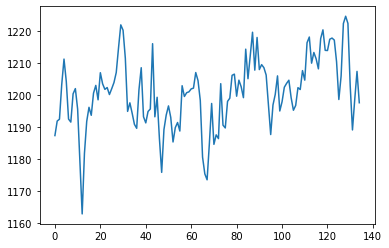

In [56]:
plt.plot(true_extrapolation)

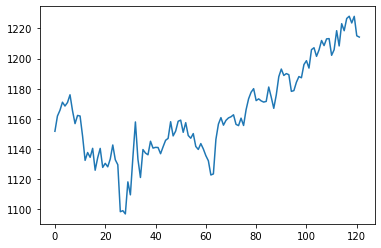

In [57]:
plt.plot(test_actual)

In [560]:
true_extrapolation = pd.Series(true_extrapolation.flatten())

In [561]:
# Terakhir = pd.Series(df['Terakhir'])
# price = pd.concat(df['Terakhir'],pd.Series(true_extrapolation.flatten()))
price = df['Terakhir'].copy()

In [562]:
price = price.append(true_extrapolation,ignore_index=True)
# all_price = pd.concat(price,true_extrapolation)

In [581]:
dates.shape

(1388,)

In [588]:
dates

0      2016-12-23
1      2016-12-27
2      2016-12-28
3      2016-12-29
4      2016-12-30
          ...    
1383   2023-11-08
1384   2023-08-14
1385   2023-08-15
1386   2023-08-16
1387   2023-08-18
Name: Date, Length: 1388, dtype: datetime64[ns]

In [608]:
import matplotlib.dates as mdates

In [639]:
dates = dates.reset_index()

In [646]:
dates.drop('index',axis=1,inplace=True)

In [686]:
final_df = pd.DataFrame({'Date': dates, 'Price': price})

In [683]:
final_df.set_index("Date",inplace = True)

In [708]:
final_df.iloc[:1389]

,Date,Price
0,2016-12-23,576.130000
1,2016-12-27,582.880000
2,2016-12-28,594.300000
3,2016-12-29,611.620000
4,2016-12-30,613.800000
...,...,...
1384,2023-08-14,1227.990000
1385,2023-08-15,1215.090000
1386,2023-08-16,1214.230000
1387,2023-08-18,1211.660000


In [710]:
final_df.to_excel('extrapolationdecember2023.xlsx', index=False)

No handles with labels found to put in legend.


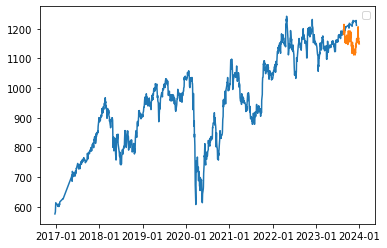

In [706]:

plt.plot(final_df['Date'][:1388].sort_values(),final_df['Price'][:1388])
plt.plot(final_df['Date'][1388:].sort_values(),final_df['Price'][1388:])

date_format = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis_date()

# Set the x-axis ticker locator to show ticks for years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())




# Rotate the tick labels for better visibility
# plt.gcf().autofmt_xdate()

plt.legend()
#plt.savefig('True vs Predicted Closing Prices - Training Set (150 Neuron).png')
plt.show()

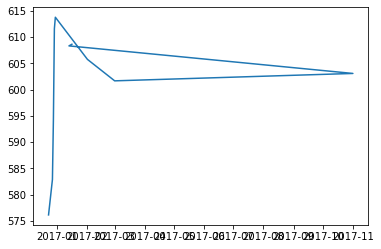

No handles with labels found to put in legend.


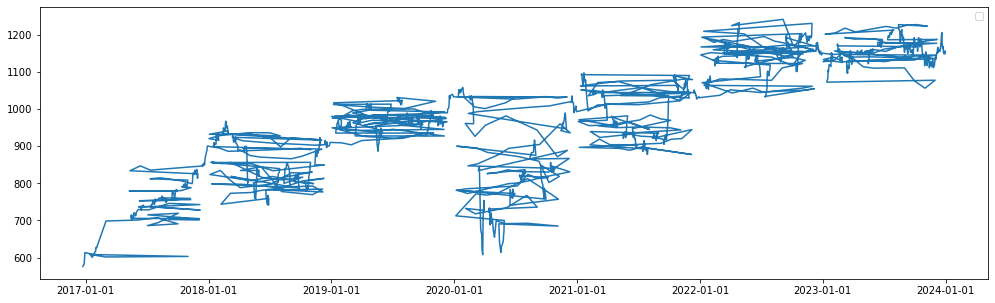

In [693]:
plt.figure(figsize=(17, 5))
plt.plot(dates,price)
# plt.plot(dates[1388:],price[1388:])

# Format the x-axis tick labels to show only the years
# date_format = mdates.DateFormatter('%Y')
# plt.gca().xaxis.set_major_formatter(date_format)
# plt.gca().xaxis_date()

# Set the x-axis ticker locator to show ticks for years
# plt.gca().xaxis.set_major_locator(mdates.YearLocator())




# Rotate the tick labels for better visibility
# plt.gcf().autofmt_xdate()

plt.legend()
#plt.savefig('True vs Predicted Closing Prices - Training Set (150 Neuron).png')
plt.show()

In [672]:
start_date = "2023-08-19"
days_to_add = 134

date_range = pd.date_range(start=start_date, periods=days_to_add+1, freq='D')
date_range = pd.Series(date_range)

In [673]:
dates = dates.append(date_range,ignore_index=True) 

In [674]:
dates

0      2016-12-23
1      2016-12-27
2      2016-12-28
3      2016-12-29
4      2016-12-30
          ...    
1518   2023-12-27
1519   2023-12-28
1520   2023-12-29
1521   2023-12-30
1522   2023-12-31
Length: 1523, dtype: datetime64[ns]

In [58]:
tes = pd.read_excel('extrapolationdecember2023.xlsx')

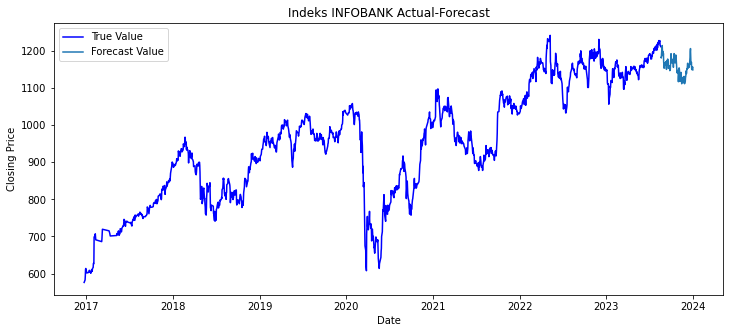

In [59]:
plt.figure(figsize=(12, 5))
plt.plot(tes['Date'][:1388],tes['Price'][:1388],label= 'True Value',color = 'blue')
plt.plot(tes['Date'][1388:],tes['Price'][1388:],label = 'Forecast Value')

plt.title("Indeks INFOBANK Actual-Forecast")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.savefig('Actual-Forecast Index INFOBANK15.png')
plt.show()

In [63]:
normalized_data

,Terakhir,USD,Emas USD,Consumer Confidence,Interest Rate (%)
0,0.000000,0.587605,0.000848,0.923189,0.222222
1,0.050504,0.079763,0.000848,0.933999,0.222222
2,0.031380,0.008586,0.000848,0.929477,0.222222
3,0.086072,0.091276,0.000848,0.930101,0.222222
4,0.090384,0.416688,0.000848,0.920746,0.222222
...,...,...,...,...,...
633,0.961668,0.639213,0.941539,0.002287,1.000000
634,0.970704,0.625138,0.928988,0.002287,1.000000
635,0.944090,0.636867,0.927591,0.002287,1.000000
636,0.942316,0.627484,0.924248,0.002287,1.000000


In [181]:
tes.shape , test_predict_small.shape

((1523, 2), (263, 1))

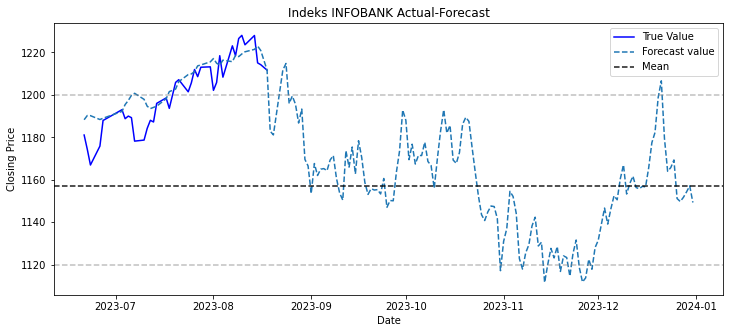

In [202]:
plt.figure(figsize=(12, 5))
plt.plot(tes['Date'][1350:1388],tes['Price'][1350:1388],label='True Value',color = 'blue')
plt.plot(tes['Date'][1350:],test_predict_small[90:],label='Forecast value',linestyle='--')
# plt.plot(tes['Date'][1387:],tes['Price'][1387:],label = 'Forecast Value',linestyle='--')
plt.axhline(1200, color='gray', linestyle='--',alpha = 0.5)
plt.axhline(1157, color='black', linestyle='--',alpha = 0.9,label='Mean')
plt.axhline(1120, color='gray', linestyle='--',alpha = 0.5)

plt.title("Indeks INFOBANK Actual-Forecast")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.savefig('Forecast Index INFOBANK15.png')
plt.show()

<Figure size 720x576 with 0 Axes>

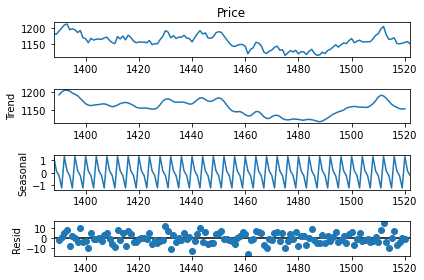

In [787]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the data
decomposition = seasonal_decompose(tes['Price'][1388:], model='additive', period=4)

# Plot the decomposition
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

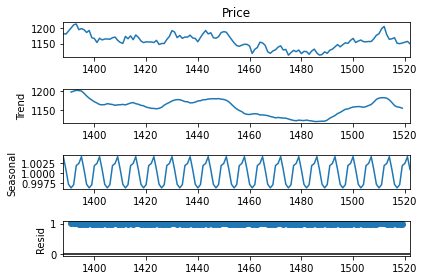

In [788]:
# Decompose the data
decomposition = seasonal_decompose(tes['Price'][1388:], model='multiplicative', period=7)

# Plot the decomposition
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.tight_layout()
plt.show()

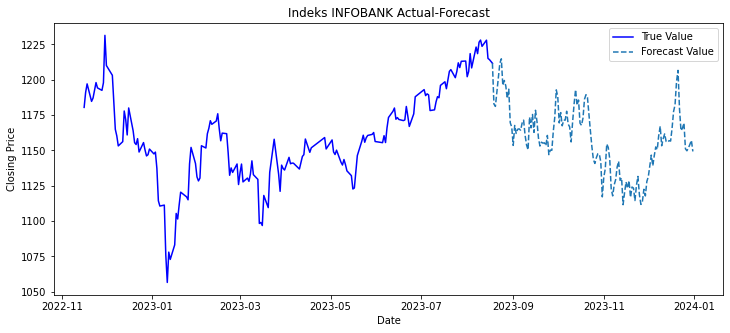

In [137]:
plt.figure(figsize=(12, 5))
plt.plot(tes['Date'][1210:1388],tes['Price'][1210:1388],label='True Value',color = 'blue')
plt.plot(tes['Date'][1387:],tes['Price'][1387:],label = 'Forecast Value',linestyle='--')
# plt.axhline(1200, color='gray', linestyle='--',alpha = 0.5)
# plt.axhline(1157, color='red', linestyle='--',alpha = 0.5,label='Mean')
# plt.axhline(1120, color='gray', linestyle='--',alpha = 0.5)

plt.title("Indeks INFOBANK Actual-Forecast")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
# plt.savefig('Forecast Index INFOBANK15.png')
plt.show()

In [817]:
# plt.plot(tes['Date'][1388:1490],tes['Price'][1388:1490],label = 'Forecast Value',linestyle='--')
X_date = tes['Date'][1388:1490].copy()
y_price = tes['Price'][1388:1490].copy()

X_date = np.array([np.datetime64(date) for date in X_date])
# y_price = [int(price) for price in y_price]
# Fit a linear regression model to the data
coefficients = np.polyfit(X_date, y_price,1)
slope = coefficients[0]
intercept = coefficients[1]

# Create the regression line
regression_line = slope * X_date.astype('datetime64[D]').view('int64') + intercept

# Plot the time series data and the trendline
plt.plot(X_date, y_price, marker='o', label='Time Series Data')
plt.plot(X_dates, regression_line, color='red', label='Trendline')


UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[us]') and dtype('float64')

In [108]:
small_predict = df2[505:].copy()

In [109]:
# Transform your data using the scaler
scaled_predict_julaug = pd.DataFrame(scaler.fit_transform(small_predict), columns=small_predict.columns)
scaled_price_julaug = scaler1.fit_transform(np.array(small_predict['Terakhir']).reshape(-1,1))

In [115]:
# train_data,test_data = data_split(normalized_data,split = 0.2)
test_small_predict,data_small_predict = data_split(scaled_predict_julaug,split = 0.0)

In [117]:
timestep = 5
# X_train,y_train = createdataset(train_data,timestep)
# X_val,y_val = createdataset(val_data,timestep)
X_test_small, y_test_small = createdataset(test_small_predict,timestep)

In [120]:
X_test_small.shape, y_test_small.shape
y_test_small = y_test_small.reshape(-1,1)

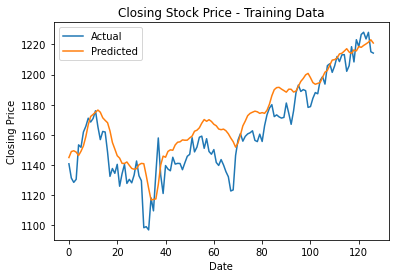

In [121]:
test_predict_small = model.predict(X_test_small)
test_predict_small = scaler1.inverse_transform(test_predict_small)
test_actual_small = scaler1.inverse_transform(y_test_small)


plt.plot(test_actual_small, label='Actual')
plt.plot(test_predict_small, label='Predicted')
plt.title('Closing Stock Price - Training Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [125]:
rmse_tes = mean_squared_error(test_actual_small,test_predict_small,squared=False)

In [132]:
test_predict_small

array([[1144.9169],
       [1148.8927],
       [1149.422 ],
       [1148.5264],
       [1146.2795],
       [1149.0823],
       [1152.6647],
       [1158.7684],
       [1166.6737],
       [1172.17  ],
       [1173.5223],
       [1175.0018],
       [1176.4379],
       [1174.9661],
       [1171.3018],
       [1169.5817],
       [1168.0178],
       [1162.5917],
       [1154.943 ],
       [1150.5964],
       [1146.1343],
       [1144.4999],
       [1141.0576],
       [1140.9885],
       [1141.9711],
       [1139.7406],
       [1137.6837],
       [1137.1476],
       [1137.5309],
       [1140.1464],
       [1141.0265],
       [1140.8241],
       [1133.0411],
       [1124.5345],
       [1116.7781],
       [1117.1498],
       [1117.4683],
       [1126.997 ],
       [1139.9717],
       [1145.8579],
       [1145.1222],
       [1148.9717],
       [1150.0259],
       [1149.756 ],
       [1153.2913],
       [1155.0726],
       [1155.3511],
       [1156.631 ],
       [1156.394 ],
       [1156.4525],


In [131]:
test_predict_small[-39:]

array([[1190.3354],
       [1189.3424],
       [1188.2974],
       [1190.2765],
       [1190.2136],
       [1188.3878],
       [1188.9891],
       [1192.225 ],
       [1195.4467],
       [1197.38  ],
       [1199.7817],
       [1200.7489],
       [1197.9034],
       [1194.6442],
       [1193.548 ],
       [1194.1289],
       [1194.6798],
       [1198.1837],
       [1201.5494],
       [1202.7363],
       [1206.2393],
       [1209.5857],
       [1209.8839],
       [1210.978 ],
       [1213.6873],
       [1214.1138],
       [1215.5654],
       [1217.1294],
       [1214.9469],
       [1213.999 ],
       [1216.3625],
       [1215.6594],
       [1218.6063],
       [1218.0326],
       [1219.2924],
       [1220.3158],
       [1221.4447],
       [1223.0549],
       [1220.9077]], dtype=float32)

In [145]:
temp = tes['Price'][1387:].copy()

In [159]:
test_predict_small = pd.Series(test_predict_small.reshape(-1))

In [162]:
test_predict_small = test_predict_small.append(temp)

In [158]:
test_predict_small.reshape(-1,)

array([1144.9169, 1148.8927, 1149.422 , 1148.5264, 1146.2795, 1149.0823,
       1152.6647, 1158.7684, 1166.6737, 1172.17  , 1173.5223, 1175.0018,
       1176.4379, 1174.9661, 1171.3018, 1169.5817, 1168.0178, 1162.5917,
       1154.943 , 1150.5964, 1146.1343, 1144.4999, 1141.0576, 1140.9885,
       1141.9711, 1139.7406, 1137.6837, 1137.1476, 1137.5309, 1140.1464,
       1141.0265, 1140.8241, 1133.0411, 1124.5345, 1116.7781, 1117.1498,
       1117.4683, 1126.997 , 1139.9717, 1145.8579, 1145.1222, 1148.9717,
       1150.0259, 1149.756 , 1153.2913, 1155.0726, 1155.3511, 1156.631 ,
       1156.394 , 1156.4525, 1157.934 , 1159.1552, 1162.382 , 1163.0474,
       1164.6572, 1167.7178, 1170.127 , 1168.9714, 1170.0148, 1168.8713,
       1166.9939, 1165.9916, 1163.8378, 1163.3921, 1163.776 , 1162.6974,
       1160.6702, 1157.8779, 1155.4537, 1151.8375, 1154.6729, 1159.8313,
       1165.9257, 1169.0934, 1172.6903, 1174.2338, 1175.0061, 1175.6865,
       1175.2698, 1174.2351, 1174.7266, 1174.2528, 

In [156]:
test_predict_small.shape

(127, 1)

In [164]:
test_predict_small = test_predict_small.reset_index()

In [175]:
test_predict_small.drop('index',axis=1,inplace=True)

In [178]:
test_predict_small.columns = ['Price']